<a href="https://colab.research.google.com/github/KONA1005/google_drive/blob/main/google_colab/Chapter_9_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM 신경망 훈련하기
- RNN은 실무에서 거의 안씀!!!
- 등장 배경
  + 문장이 길면 학습 능력이 떨어져 그거에 대한 대안 LSTM
  + Long Short-Term Memory
  + 정보손실 안일어나게 해준다
- 단기 기억을 오래오래 기억하기 위해서 고안되었다.

- 입력층 안에 정보와 메모를 포스트잇으로 붙이는 컨셉(?)
- 528p ~

## 데이터 불러오기

In [ ]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

17473536/17464789 [==============================] - 0s 0us/step


## padding

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

## 모형 만들기

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length = 100))
model.add(keras.layers.LSTM(8)) # SimpleRNN 대신 LSTM
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=10, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb]) # 에포크 원래 100개 , 느려서 10개만 돌렸다

Epoch 1/10
313/313 [==============================] - 19s 54ms/step - loss: 0.6922 - accuracy: 0.5535 - val_loss: 0.6907 - val_accuracy: 0.6198
Epoch 2/10
313/313 [==============================] - 15s 47ms/step - loss: 0.6867 - accuracy: 0.6350 - val_loss: 0.6781 - val_accuracy: 0.6518
Epoch 3/10
313/313 [==============================] - 16s 51ms/step - loss: 0.6458 - accuracy: 0.6700 - val_loss: 0.6091 - val_accuracy: 0.7210
Epoch 4/10
313/313 [==============================] - 13s 42ms/step - loss: 0.5960 - accuracy: 0.7339 - val_loss: 0.5878 - val_accuracy: 0.7310
Epoch 5/10
313/313 [==============================] - 13s 42ms/step - loss: 0.5736 - accuracy: 0.7513 - val_loss: 0.5658 - val_accuracy: 0.7504
Epoch 6/10
313/313 [==============================] - 13s 41ms/step - loss: 0.5561 - accuracy: 0.7606 - val_loss: 0.5523 - val_accuracy: 0.7580
Epoch 7/10
313/313 [==============================] - 13s 43ms/step - loss: 0.5391 - accuracy: 0.7690 - val_loss: 0.5382 - val_accuracy:

## 손실 곡선 추가

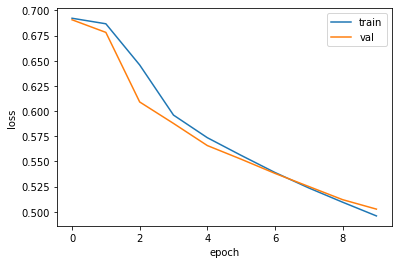

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 순환층에 드롭아웃 적용하기
- 드롭아웃 하는 이유 : 똑같은 값만 나오고 연산 출력이 안돼, 얘는 0값이 너무 많아

Epoch 1/10
313/313 [==============================] - 17s 45ms/step - loss: 0.6919 - accuracy: 0.5434 - val_loss: 0.6902 - val_accuracy: 0.6140
Epoch 2/10
313/313 [==============================] - 14s 44ms/step - loss: 0.6875 - accuracy: 0.6133 - val_loss: 0.6832 - val_accuracy: 0.6514
Epoch 3/10
313/313 [==============================] - 14s 45ms/step - loss: 0.6728 - accuracy: 0.6614 - val_loss: 0.6526 - val_accuracy: 0.6858
Epoch 4/10
313/313 [==============================] - 14s 45ms/step - loss: 0.6069 - accuracy: 0.7078 - val_loss: 0.5765 - val_accuracy: 0.7154
Epoch 5/10
313/313 [==============================] - 14s 44ms/step - loss: 0.5606 - accuracy: 0.7297 - val_loss: 0.5457 - val_accuracy: 0.7460
Epoch 6/10
313/313 [==============================] - 14s 44ms/step - loss: 0.5341 - accuracy: 0.7536 - val_loss: 0.5217 - val_accuracy: 0.7604
Epoch 7/10
313/313 [==============================] - 14s 44ms/step - loss: 0.5142 - accuracy: 0.7628 - val_loss: 0.5029 - val_accuracy:

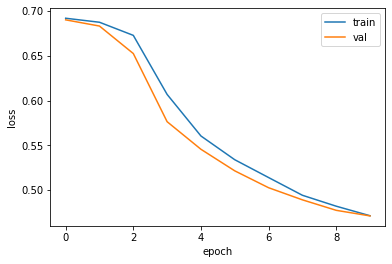

In [ ]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
# 드롭아웃 추가
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

# epcohs = 100
history = model2.fit(train_seq, train_target, epochs=10, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()